<a href="https://colab.research.google.com/github/ankiboyz/MachineLearningLaunchpad/blob/main/SimpleLinearRegression/1_MLL_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tackling the Simple Linear Regression problem the Partial Derivatives way!

## Creating the Needed Dataframe

In [1]:
# Here, we upload the dataset that is kept under the datasets folder in the MachineLearningLaunchPad github repository.

In [2]:
# importing the needed libraries
import pandas as pd

In [3]:
# The most efficient way would be create a function that would load this dataset in the current working tool memory.

def get_dataset(name):
  """ The function is simple as in it takes the name of the dataset
      and returns the dataset as a dataframe.
      Please note this is a simplistic function for the demonstration purposes 
      of the knowledge covered in this course.
      The objective is the consolidate grasp over the concepts of various techniques in 
      Machine Learning Domain and neccesarily do not consider the performance
      and efficiency aspect in devisisng this function particularly. 
      Performance, Efficiency, Throughput, Latency are the aspects that are 
      dealt with in the separate section of the course as underlined by the 
      Author.
  """

  # Here, we make a constant to refer to the path wherein the datasets are stored.
  REPOS_DATASETS_PATH = "https://github.com/ankiboyz/MachineLearningLaunchpad/blob/main/"

  # import the dataset relative path from the repository.
  import httpimport

  with httpimport.github_repo(username='ankiboyz', repo='MachineLearningLaunchpad', module='datasets_relative_path_config'):
    import datasets_relative_path_config


  # print(datasets_relative_path_config.id_dataset_dict[name])
  # Here, we gather the dataset path corresponding to the name passed in the 
  # get_dataset method.
  # for eg for name=EAWE01 the path "datasets/EAWE01.csv" is gathered.
  dataset_path = datasets_relative_path_config.id_dataset_dict[name]['PATH']

  raw_mode = "?raw=true"

  #Full path is created, after joining the 2 strings.
  EAWE01_df = pd.read_csv(''.join([REPOS_DATASETS_PATH, dataset_path, raw_mode]))

  # print(EAWE01_df.head())

  return EAWE01_df


In [4]:
EAWE01_df = get_dataset('EAWE01')

In [5]:
EAWE01_df.head().style

,ID,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,S,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,PRFSTYAN,PRFSTYAE,SINGLE,MARRIED,COHABIT,OTHSING,FAITHN,FAITHP,FAITHC,FAITHJ,FAITHO,FAITHM,ASVABAR,ASVABWK,ASVABPC,ASVABMK,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,EARNINGS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC,EXP
0,618,0,1,1981,30,23.000000,74100.000000,396.000000,1,0,0,0,0,0,0,1,0,0,0,1,0,12,0,0,0,0,0,1,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,1,0,0,0,1,0,0,0,0.034148,-0.043527,0.468882,0.497470,0.652621,-0.854901,0.135203,0.267162,0.226440,59993,68,210,245,12,11,12.000000,11.000000,2,0,0,0,1,1,0,0,6.000000,20.000000,40,0.653846,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,10.192310
1,3253,0,1,1984,27,33.000000,nan,nan,1,0,0,0,0,0,0,0,1,0,0,0,1,13,0,0,0,0,0,1,0,0,9.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1,0,0,0,0,1,0,0,0,0,-0.774266,0.834018,-0.143829,-0.543168,-0.706687,-0.529883,-0.236305,-0.176151,0.367670,35741,72,165,180,13,16,13.000000,16.000000,1,0,1,0,0,0,1,0,6.000000,7.650000,33,0.942308,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,4.615385
2,537,0,1,1982,29,22.000000,36960.000000,231.000000,0,0,0,1,0,0,0,1,0,0,0,0,1,11,0,0,0,0,0,0,0,1,6.000000,nan,0.000000,1.000000,0.000000,0.000000,nan,nan,nan,nan,0,0,1,0,0,0,1,0,0,0,-2.571871,-0.899535,-1.313528,-1.362414,-1.263278,-3.356692,-2.021991,-1.720846,-1.180568,5305,73,270,265,10,13,nan,13.000000,2,0,0,0,1,0,1,0,9.000000,17.440000,20,5.076923,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,10.038460
3,1367,0,1,1984,27,26.000000,51512.000000,324.000000,1,0,0,0,0,0,0,0,1,0,0,0,1,16,0,0,0,1,0,0,0,0,10.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,1.592383,1.605780,1.430849,1.057630,1.173893,1.801206,1.709106,1.590669,1.618972,93929,67,170,180,12,14,12.000000,14.000000,1,0,0,1,0,0,1,0,3.000000,22.600000,40,4.596154,0,1,0,0,0,0,2,0,0,1,0,0,0,0,1,0,5.730769
4,4193,0,1,1982,29,23.000000,974.000000,6.000000,0,0,0,1,0,0,0,0,1,0,0,1,0,13,0,0,0,0,0,1,0,0,nan,8.000000,nan,nan,nan,nan,0.000000,0.000000,1.000000,0.000000,0,0,1,0,0,0,1,0,0,0,-0.248911,0.876201,-0.357156,-0.671208,-0.658565,-0.628205,0.005386,-0.112862,0.276403,43811,67,181,186,10,12,nan,12.000000,7,0,0,1,0,0,1,0,10.000000,13.000000,48,2.903846,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,9.576923


In [6]:
# Now, we have got the dataset as the dataframe.
# For this challenge, we only need 2 columns i.e column header name as 'S' and 'EARNINGS'
EAWE01_df[['S','EARNINGS']].head()

,S,EARNINGS
0,12,20.00
1,13,7.65
2,11,17.44
3,16,22.60
4,13,13.00


In [7]:
# Creating the work dataframe.
work_df = EAWE01_df[['S','EARNINGS']]

## Simple Linear regression - Via Partial Derivatives 

### The work_df dataframe has two columns.
'**S**' --> a continuous variable, denoting the Years of Schooling (highest grade completed as of 2002)

'**EARNINGS**' --> a continuous variable, denoting the Current hourly earnings in $ reported at the 2002 interview

In [8]:
work_df.head()
work_df.tail()

,S,EARNINGS
495,11,9.00
496,20,28.95
497,17,28.85
498,13,10.95
499,12,8.75


Here, as we have understood from the session on the Simple Linear Regression, we will try to gather the estimates of the coefficients of the intercept and the single independent variable that we have.


---
The equations are as follows:
And we know: 

n = number of instances.

$X_i$ = ith instance of the independent variable (**Schooling**).

$Y_i$ = ith instance of the dependent variable.(**Earnings**)
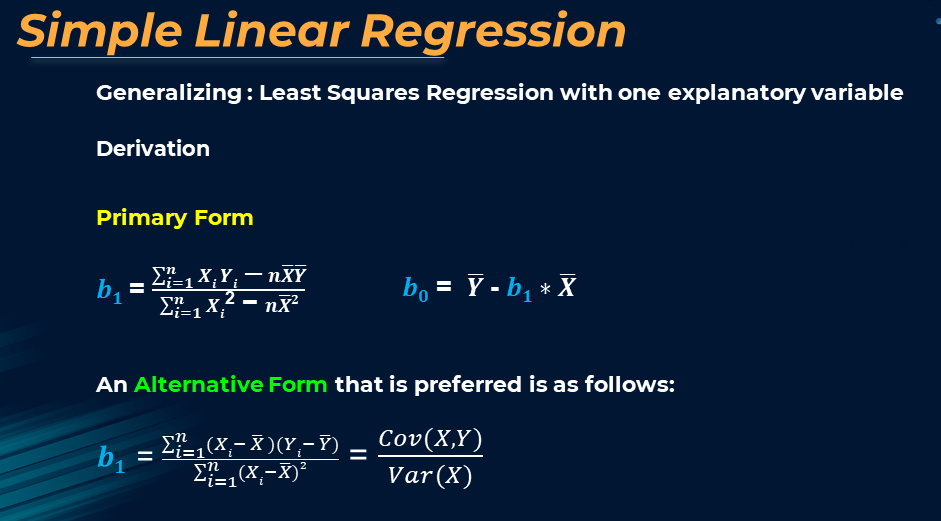






### Solving for the Primary Form.

$b_1 =\frac{\sum_{i=1}^nX_iY_i - n\overline{X}\overline{Y}}{\sum_{i=1}^nX_i^2-n\overline{X}^2}$ and $b_0 = \overline{Y}-b_1*\overline{X}$

In [9]:
# Calculating b1 first.

# Step 1 - taking sum of S and EARNINGS, so that mean of them can be calculated.
sum_S = work_df['S'].sum()
sum_EARNINGS = work_df['EARNINGS'].sum()
n = len(work_df.index)

# Calculating the mean values.
mean_S = sum_S/n
mean_EARNINGS = sum_EARNINGS/n

# Calculating squared sum of the independent variables i.e. S.
squared_sum_S = sum(list(map(lambda x:x**2, work_df['S'])))

# Calculating product sum of the independent variables i.e. S. and the dependent variable i.e EARNINGS.
product_sum_S_EARNINGS = sum(list(map(lambda x,y:x*y , work_df['S'], work_df['EARNINGS'])))

# Calculating square of mean_S.
mean_S_squared = mean_S**2

# b1 formulae.
b1 = ((product_sum_S_EARNINGS - n*(mean_S)*(mean_EARNINGS)) / ((squared_sum_S) - n*(mean_S**2)))

print(sum_S, sum_EARNINGS, n, mean_S, mean_EARNINGS, squared_sum_S, product_sum_S_EARNINGS, mean_S_squared, b1)


7274 9172.88 500 14.548 18.34576 109678 137490.56000000006 211.644304 1.048667312611927


In [10]:
# Calculating b0
b0 = mean_EARNINGS - (b1*mean_S)

print(b0)

3.089747936121684


#### So, we have the following equation:

$\hat{Y} = b_0 + b_1*X$ (substituting the values of $b_0,b_1$ as inferred from above)

$\hat{Y} = 3.1 + 1*X$ ( $b_0,b_1 $ rounded off to the first decimal place)

Let's now plot the actual and the predicted EARNINGS value against the Schooling (S)

In [13]:
# Specifying the variables to be plotted.
S = work_df['S']
actual_EARNINGS = work_df['EARNINGS']
predicted_EARNINGS = pd.Series(map(lambda x : 3.1+1*x, S))

print(type(predicted_EARNINGS), len(predicted_EARNINGS))

<class 'pandas.core.series.Series'> 500


In [ ]:
# Simple Chart.
